In [2]:
import numpy as np
import matplotlib.pyplot as plt
from QBM import PickleDataProcessing

Ns = range(2, 7)
ts = [1000, 2000, 4000, 8000, 16000, 32000]

# plt.plot(Ns, np.sin(Ns))

list(map(str, map(int, Ns)))

['2', '3', '4', '5', '6']

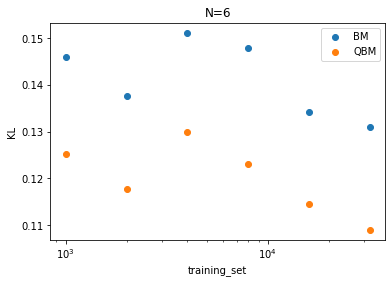

In [14]:
from QBM import pickle_data_processing

Ns = range(2, 7)
ts = [1000, 2000, 4000, 8000, 16000, 32000]

pickle_data_processing(4, ts, trials=20).plot(xscale="log")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from QBM import PickleDataProcessing, QBM_model
import copy

Ns = range(2 ,7)

x = PickleDataProcessing(Ns, 1000)
data = copy.deepcopy(x.N_data)
data["BM"] = []
data["QBM"] = []
top=10

for i in range(5):
    data["BM"].append(sum(sorted(x.N_data["BM"].T[i])[:top])/top)
    data["QBM"].append(sum(sorted(x.N_data["QBM"].T[i])[:top])/top)

print(sum(x.N_data["BM"].T[0])/top, sum(x.N_data["QBM"].T[0])/top)
data

9.366021846979322e-12 1.8720164307595155e-12


{'BM': [9.366021846979322e-12,
  0.009149607508861703,
  0.03574411692757533,
  0.09614315383837505,
  0.16203588649798],
 'QBM': [1.8720164307595155e-12,
  0.008124286524574809,
  0.03134530052424441,
  0.08733080479971049,
  0.14521431476465266]}

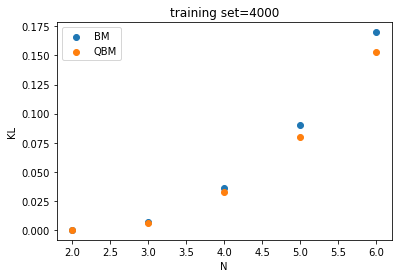

In [19]:
Ns = range(2, 7)
pickle_data_processing(Ns, 4000).plot()

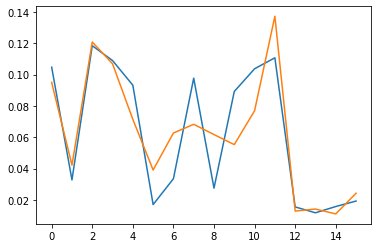

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from QBM import PickleDataProcessing, QBM_model

N = 4
t = 4000
trial = 17

model = QBM_model(N, t)
pickle_data = PickleDataProcessing(N, t, trials=trial)

result = pickle_data.get_single_data()
theta = result["BM_result"].x
Pv_data = result["Pv_data"]
N = pickle_data.Ns
H = np.zeros([2**N, 2**N])

# 매개변수
b = np.zeros(N)
w = np.zeros([N, N])


# 매개변수 행렬 생성
for i in range(N):
    b[i] = theta[i]
    for j in range(N):
        if i < j:
            w[i][j] = theta[N - 1 + int((N - 3/2 - i/2) * i + j)]
            w[j][i] = w[i][j]


# 해밀토니언 계산
for i in range(N):
    H -= b[i] * model.sigma_z(i)
    for j in range(N):
        H -= w[i][j] * np.dot(model.sigma_z(i), model.sigma_z(j))

Z = np.trace(expm(-H))
rho = expm(-H)/Z
P = []

for v in range(2**N):
    Pv = np.trace(np.dot(model.lambda_v(v), rho))
    P.append(Pv)

plt.plot(range(16), Pv_data)
plt.plot(range(16), P)

[0.03483131 0.03141054 0.0302108  0.02947321 0.02993124 0.02858985]


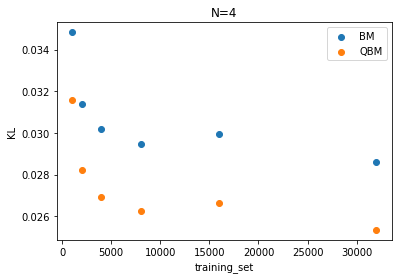

In [47]:
Ns = range(2, 7)
ts = [1000, 2000, 4000, 8000, 16000, 32000]

print(np.mean(PickleDataProcessing(4, ts, trial_range=(60, 65)).get_training_set_data(mean=False)['BM'], axis=0))
PickleDataProcessing(4, ts, trial_range=(60, 65)).plot()

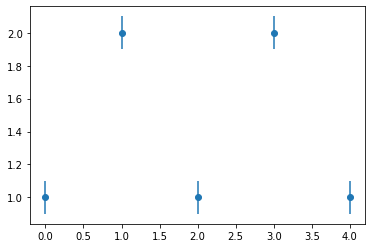

In [38]:
x = range(5)
y = [1, 2, 1, 2, 1]
ymin = [0.1]*5
ymax = [0.1]*5
yerr = [ymin, ymax]

plt.errorbar(x, y, yerr=yerr, fmt='o')
plt.show()